In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [6]:
df.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [7]:
train = df[:-4]
test = df[-4:]

In [8]:
hist_mean = np.mean(train['data'])
print(hist_mean)

4.308499987499999


In [9]:
print(test)

          date   data
80  1980-01-01  16.20
81  1980-04-01  14.67
82  1980-07-02  16.02
83  1980-10-01  11.61


In [10]:
test.loc[:,'pred_mean'] = hist_mean

/var/folders/r6/ll0mn_f10xv5sjtcfcsw16880000gn/T/ipykernel_47119/4133429516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_mean'] = hist_mean


In [11]:
def mape(y_actual, y_pred): ### define MAPE - Mean absolute percentage error
    return np.mean(np.abs(y_actual-y_pred)/y_actual) * 100

In [12]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


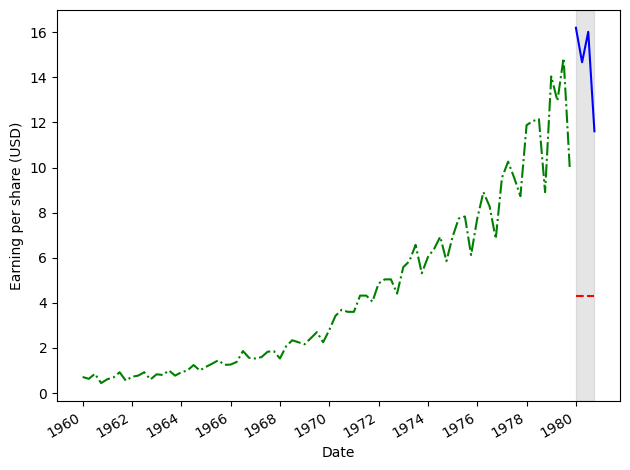

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'],'g-.', label= "Train")
ax.plot(test['date'], test['data'],'b-', label= "Test")
ax.plot(test['date'], test['pred_mean'],'r--', label= "Pred")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.axvspan(80, 83, color='#808080', alpha=0.2) # alpha is opacity param
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

In [14]:
## taking last year mean now
hist_year_mean = np.mean(train.data[-4:])
print(hist_year_mean)

12.96


In [15]:
test.loc[:, "pred_last_year_mean"] = hist_year_mean

/var/folders/r6/ll0mn_f10xv5sjtcfcsw16880000gn/T/ipykernel_47119/1341158835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_year_mean"] = hist_year_mean


In [16]:
mape_last_year_mean = mape(test["data"],test["pred_last_year_mean"])
print(mape_last_year_mean)

15.5963680725103


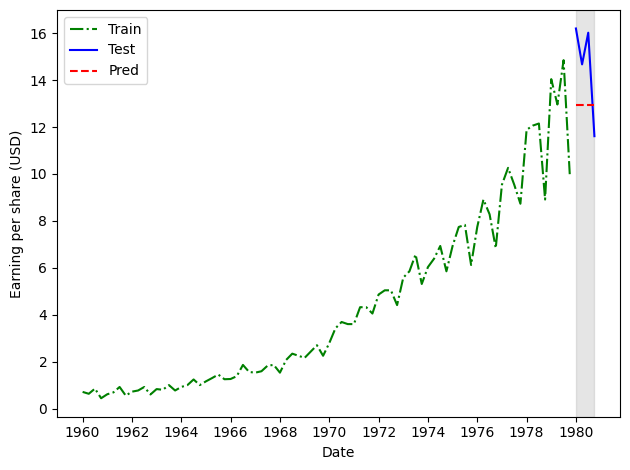

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'],'g-.', label= "Train")
ax.plot(test['date'], test['data'],'b-', label= "Test")
ax.plot(test['date'], test['pred_last_year_mean'],'r--', label= "Pred")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.axvspan(80, 83, color='#808080', alpha=0.2) # alpha is opacity param
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate
plt.tight_layout()
plt.savefig('/Users/pulin05/Downloads/CH02_F07_peixeiro.png', dpi=300)